### Read rds with cell types
Read file with cell annotations

In [19]:
import pyreadr
import os
path= os.getcwd().split('enhancer-promoter-interactions')[0]+"enhancer-promoter-interactions"


In [20]:
# Read the file
annot = pyreadr.read_r(path + '/data/muszka/calderon_data/atac_meta.rds')
annot = annot[None]
annot.head()

,cell,doublet_score,exp,time,sample,seurat_clusters,lasso_age,NNv1_age,lasso_time.new,NNv1_time.new,seurat_clusters.predtime,refined_annotation
rownames,,,,,,,,,,,,
CTATGGTTCGTTCCATTCTTTCTCATTGCCCTCTGCGATC,CTATGGTTCGTTCCATTCTTTCTCATTGCCCTCTGCGATC,0.802721,exp1,03-07,exp1_hrs03-07_b1,7,-3.110988,1.690188,00-02,00-02,3,Blastoderm
AGATAATTCCTTCCATTCTTAGTCGCGTCGAAGTTCGCTG,AGATAATTCCTTCCATTCTTAGTCGCGTCGAAGTTCGCTG,0.700680,exp1,03-07,exp1_hrs03-07_b1,6,-1.039036,1.330054,00-02,00-02,1,Blastoderm
TCCTCTTAACCTAGCTTCTTGTAGTAGTCCTGATTCTCGT,TCCTCTTAACCTAGCTTCTTGTAGTAGTCCTGATTCTCGT,0.505102,exp1,03-07,exp1_hrs03-07_b1,1,-3.924070,1.984080,00-02,00-02,1,Blastoderm
ACGGCAAGCAATATCTTCCGGAGCTCAGCCCCTACTCAAC,ACGGCAAGCAATATCTTCCGGAGCTCAGCCCCTACTCAAC,0.653061,exp1,03-07,exp1_hrs03-07_b1,1,2.537512,1.861791,02-04,00-02,2,Blastoderm
AACTTACGCTCATTCTGATGCCAATTCCATGTCGTTCGCC,AACTTACGCTCATTCTGATGCCAATTCCATGTCGTTCGCC,0.671769,exp1,03-07,exp1_hrs03-07_b1,1,-1.401258,1.801240,00-02,00-02,2,Blastoderm


### Data preparation
Read intersection of cicero results and chromatin loops.
This intersection is a result of the another script 'intersection_calderon.ipynb'. This table contains loops found by cicero, which intersect with chromatin loops from hic data.

In [21]:
import pandas as pd

found = pd.read_csv(path+'/results/calderon/ready_intersected_chromatin_loops_cicero_1ds_6-10h.csv', delimiter=',', index_col=0)
found.replace(False, None, inplace=True)
found.replace('False', None, inplace=True)
found.head(6)


,chr,start1,end1,start2,end2,cicero_found,cicero_region,score,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia
0,2L,395670,395790,17260794,17260893,0,None,0.000000,0.0,1.0,0.0
1,2L,395670,395790,17328015,17328118,0,None,0.000000,0.0,1.0,0.0
2,2L,918896,918995,2595491,2595585,0,None,0.000000,0.0,0.0,0.0
3,2L,921771,922766,2612166,2612266,0,None,0.000000,1.0,1.0,1.0
4,2L,921771,922766,2677575,2677786,0,None,0.000000,1.0,1.0,1.0
5,2L,1080470,1085470,1099460,1105170,1,"['[1081053, 1081256]', '[1102440, 1102730]']",0.012162,0.0,0.0,0.0


In [22]:
found['cicero_found'].sum()

231

Now we want to make some operations on the sparse matrix GSE190130_exp1_hrs06-10_b1.peak_matrix.mtx.gz. As this matrix is very big (ca. 10^5 x 10^5) I want to select only this rows from the matrix, which correspond to regions found by cicero. To do that, we need to prepare a list of that regions. It is done below.

In [23]:
import re
regions_col = found['cicero_region']
chromosomes = found['chr']
found['cicero_anchor1']=None
found['cicero_anchor2']=None
regions = []
for index,row in found.iterrows():
    chr = row['chr']
    region_pair = row['cicero_region']
    if region_pair:
        region_pair = region_pair.split(',')
        region_pair = [re.sub("[^0-9]", '', reg) for reg in region_pair]
        regions = regions + ['chr'+chr+'_'+str(int(region_pair[0])+1)+'_'+region_pair[1], 'chr'+chr+'_'+str(int(region_pair[2])+1)+'_'+region_pair[3]]
        found.loc[index,'cicero_anchor1'] = 'chr'+chr+'_'+str(int(region_pair[0])+1)+'_'+region_pair[1]
        found.loc[index,'cicero_anchor2'] = 'chr'+chr+'_'+str(int(region_pair[2])+1)+'_'+region_pair[3]

print(regions)
# with open(path+'/data/muszka/calderon_data/cicero_regions_1ds_6-10h.txt', 'w') as f:
#     for item in regions:
#         f.write("%s\n" % item)

['chr2L_1081054_1081256', 'chr2L_1102441_1102730', 'chr2L_1252168_1252364', 'chr2L_1344975_1345125', 'chr2L_1421439_1422075', 'chr2L_1463269_1463850', 'chr2L_1615642_1615877', 'chr2L_1652007_1652223', 'chr2L_1954532_1954828', 'chr2L_1970466_1970868', 'chr2L_2279497_2279704', 'chr2L_2309075_2309239', 'chr2L_2612097_2612323', 'chr2L_2677574_2677799', 'chr2L_3661599_3661874', 'chr2L_3681358_3681921', 'chr2L_3730256_3730585', 'chr2L_3756054_3756217', 'chr2L_3991715_3992003', 'chr2L_4029644_4030094', 'chr2L_5273921_5274495', 'chr2L_5320080_5320505', 'chr2L_5403495_5403951', 'chr2L_5461204_5461627', 'chr2L_5465267_5465545', 'chr2L_5514836_5515066', 'chr2L_6075389_6075826', 'chr2L_6090401_6090972', 'chr2L_5400985_5401201', 'chr2L_5418204_5418473', 'chr2L_5418204_5418473', 'chr2L_5465267_5465545', 'chr2L_6176929_6177393', 'chr2L_6249464_6249792', 'chr2L_7138467_7138928', 'chr2L_7156454_7156778', 'chr2L_7543548_7543862', 'chr2L_7591748_7592167', 'chr2L_9018734_9018898', 'chr2L_9071208_9071569',

At that point I selected regions, but I made it in another place - using server, because of matrix huge size. Now I load that matrix with less rows as orginally.

In [24]:
import scipy.io
import scipy.sparse
import pandas as pd
import numpy as np

mat = scipy.io.mmread(path + '/data/muszka/calderon_data/matrix_6-10h_selected_regions.mtx')
mat = mat.tocsr()
mat = pd.DataFrame.sparse.from_spmatrix(mat)
mat.head()

,0,1,2,3,4,5,6,7,8,9,...,118105,118106,118107,118108,118109,118110,118111,118112,118113,118114
0,0,1,0,1,0,0,5,0,3,3,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,6,9,2,2,33,0,10,10,...,0,0,0,0,0,0,0,0,0,0


In [25]:
mat.shape

(445, 118115)

In [26]:
import gzip
data_path = path + '/data/muszka/calderon_data'
regions = pd.read_table(data_path+'/cicero_regions_1ds_6-10h.txt', header=None)
region_names = regions.iloc[:,0].values
peakinfo = pd.read_table(gzip.open(data_path+'/GSE190130_exp1_hrs06-10_b1.peak_matrix.rows.txt.gz', 'rt'), header=None)
rownames = peakinfo[peakinfo[0].isin(region_names)].iloc[:,0].values

mat.index = rownames
cellinfo = pd.read_table(gzip.open(data_path+'/GSE190130_exp1_hrs06-10_b1.peak_matrix.columns.txt.gz', 'rt'), header=None)
mat.columns = cellinfo.iloc[:,0].values
mat.head()

,CTTCGCCGTTCCGGCTGAGCACTCGGCATATATTGGAATA,TCAGAACGACGGAGAATGGCTCTCATTGCCCTATCCAACC,CCTTGGCGAACTAGCTTCTTGATAGCCGATCGGCGCCAGG,TAGGTATGAATCGTTCATTAAGTCATGGATGAGACGTACG,GTAGAGACGAACGAGGAGCCGAGCTCAGCCCGCTTAGATC,GGACGGCATGCCGAAGGTTACTGATCAGAGGAGGAACTCA,GTCATCGACCTTGGAACTGGTGGACCAAGGACTCCAACGG,AATTAACCATCTGCGCTGGTGAATGAATAATATTGGAATA,AATGCTCTGATCCAATGGTTTCTGCGTCGCAGAATCCTCG,TCGAGGTCTTCCGGCTGAGCACTCGGCATAGATCGCTGAG,...,GTATCTCGATCATTCTGATGGTTCGAGGCGCTCAATGGTC,GTCAACTAATTTCCATTCTTGAGCTCAGCCTGAACTTCGA,ATGGCTCGGTACGAGGAGCCTGGACCAAGGTATTGGAATA,CTACCATCTCAGCTGAACGCGGCAGCAGTTACCTGATAGG,AACCAATAACGGCGTCTGCCAGTCATGGATTTATAGGCAT,CGTCCTAGCTATATCTTCCGACTCGGCATAGGAATGACCG,CAGTAGTAATTGCCATGGAAGCGGTTGGAAGATCGCTGAG,TCTCTGATCGTAAGGAACGGGCGCCTAGTTGAATGCAACC,TAGCATTGATCGATATATCTCCGGTCCTAACCTAACGACG,TCCAGCTCTCACTCCAGATTCGTCAGTCAAACTTCAGCAA
chr2L_1081054_1081256,0,1,0,1,0,0,5,0,3,3,...,0,0,0,0,0,0,0,0,0,0
chr2L_1102441_1102730,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
chr2L_1252168_1252364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr2L_1344975_1345125,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr2L_1421439_1422075,3,1,6,9,2,2,33,0,10,10,...,0,0,0,0,0,0,0,0,0,0


Not all cells from matrix are present in annotation file. We will look at them histogram.

In [27]:
available_cells = cellinfo[cellinfo[0].isin(annot['cell'])][0].values
non_available_cells = cellinfo[~cellinfo[0].isin(annot['cell'])][0].values
mat_avail = mat[available_cells]
mat_not_avail = mat[non_available_cells]

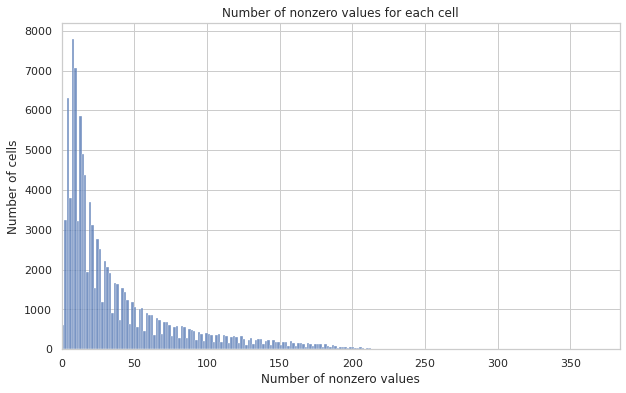

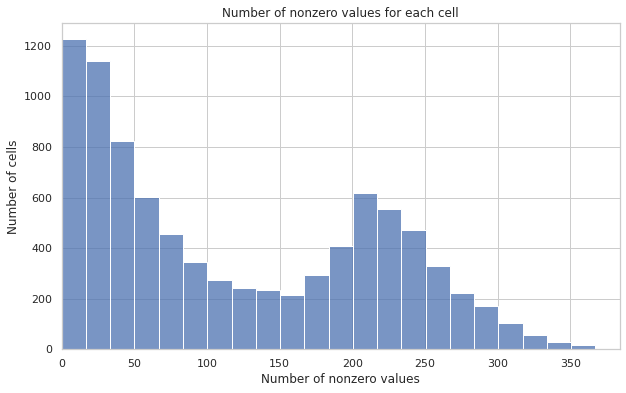

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the maximum x-value forprint(len(available_cells))
max_nonzero = max(mat_avail.astype(pd.SparseDtype(bool)).sum(axis=0).max(), mat_not_avail.astype(pd.SparseDtype(bool)).sum(axis=0).max())

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(mat_avail.astype(pd.SparseDtype(bool)).sum(axis=0))
plt.title('Number of nonzero values for each cell')
plt.xlabel('Number of nonzero values')
plt.ylabel('Number of cells')
plt.xlim(0, max_nonzero)  
plt.show()

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(mat_not_avail.astype(pd.SparseDtype(bool)).sum(axis=0))
plt.title('Number of nonzero values for each cell')
plt.xlabel('Number of nonzero values')
plt.ylabel('Number of cells')
plt.xlim(0, max_nonzero)  
plt.show()

In [29]:
print(len(set(annot['cell'])), len(set(cellinfo.iloc[:,0].values)))
print(len(annot['cell']), len(cellinfo.iloc[:,0].values))

976456 118115
976456 118115


In [30]:
'TAGGTATGAATCGTTCATTAAGTCATGGATGAGACGTACG' in annot['cell']

False

In [31]:
mat = mat.loc[:,available_cells]
annot=annot.loc[available_cells]

Now we will reformat matrix will found intersected loops. New matrix should have one row for each (loop_id,cell_type) pair, where cell_types come from annotation file.

In [32]:
cell_types = set(annot['refined_annotation'].values)
found_new_format = pd.concat([found] * len(cell_types))
found_new_format.sort_index(inplace=True)

found_new_format['cell_type'] = list(cell_types) * found.shape[0]
found = found_new_format
found.reset_index(drop=True, inplace=True)


In [33]:
found

,chr,start1,end1,start2,end2,cicero_found,cicero_region,score,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,cicero_anchor1,cicero_anchor2,cell_type
0,2L,395670,395790,17260794,17260893,0,None,0.0,0.0,1.0,0.0,None,None,Blastoderm
1,2L,395670,395790,17260794,17260893,0,None,0.0,0.0,1.0,0.0,None,None,Hindgut prim.
2,2L,395670,395790,17260794,17260893,0,None,0.0,0.0,1.0,0.0,None,None,Yolk
3,2L,395670,395790,17260794,17260893,0,None,0.0,0.0,1.0,0.0,None,None,Malpighian tubule
4,2L,395670,395790,17260794,17260893,0,None,0.0,0.0,1.0,0.0,None,None,Epidermis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15424,X,22649000,22658000,22915000,22922000,0,None,0.0,0.0,0.0,0.0,None,None,Ventral midline
15425,X,22649000,22658000,22915000,22922000,0,None,0.0,0.0,0.0,0.0,None,None,Salivary gland
15426,X,22649000,22658000,22915000,22922000,0,None,0.0,0.0,0.0,0.0,None,None,Mesoderm anlage
15427,X,22649000,22658000,22915000,22922000,0,None,0.0,0.0,0.0,0.0,None,None,Ventral nerve cord prim.


### Calculating statistics
In next step we will calculate for each row 4 values from the confusion matrix (closed/open vs. this type/other types).

In [34]:
def calculate_confusion_matrix_values(row, mat):
    
    if row.name % 1000 == 0:
        print(row.name)

    if row['cicero_found']==0:
        return pd.Series([None, None, None, None], index=['closed_this-type','closed_other-type','opened_this-type','opened_other-type'])
        
    mat_region1 = mat.loc[row['cicero_anchor1']]
    mat_region2 = mat.loc[row['cicero_anchor2']]
    selected_cells = annot[annot['refined_annotation'] == row['cell_type']].index
    other_cells = annot[annot['refined_annotation'] != row['cell_type']].index

    closed_this_type = ((mat_region1[selected_cells] == 0) | (mat_region2[selected_cells] == 0)).sum()
    closed_other_type = ((mat_region1[other_cells] == 0) | (mat_region2[other_cells] == 0)).sum()
    opened_this_type = ((mat_region1[selected_cells] > 0) & (mat_region2[selected_cells] > 0)).sum()
    opened_other_type = ((mat_region1[other_cells] > 0) & (mat_region2[other_cells] > 0)).sum()


    return pd.Series([closed_this_type,closed_other_type,opened_this_type,opened_other_type], index=['closed_this-type','closed_other-type','opened_this-type','opened_other-type'])

In [ ]:
# it takes ca. 5h to run
found[['closed_this-type','closed_other-type','opened_this-type','opened_other-type']] = found.apply(calculate_confusion_matrix_values,axis=1,args=(mat,))
found[found['cicero_found']==1] 

In [341]:
#save results as computation takes a lot of time
#found.to_csv(path+'/results/calderon/intersected_chromatin_loops_cicero_1ds_6-10h_open_this-type.csv')

In [35]:
found = pd.read_csv(path+'/results/calderon/intersected_chromatin_loops_cicero_1ds_6-10h_open_this-type.csv', delimiter=',', index_col=0)
found.head(6)

,index,chr,start1,end1,start2,end2,cicero_found,cicero_region,score,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,cicero_anchor1,cicero_anchor2,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type
0,0,2L,395670,395790,17260794,17260893,0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,Ventral midline,NaN,NaN,NaN,NaN
1,1,2L,395670,395790,17260794,17260893,0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,Ectoderm anlage,NaN,NaN,NaN,NaN
2,2,2L,395670,395790,17260794,17260893,0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,Muscle prim.,NaN,NaN,NaN,NaN
3,3,2L,395670,395790,17260794,17260893,0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,Blastoderm,NaN,NaN,NaN,NaN
4,4,2L,395670,395790,17260794,17260893,0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,Brain prim.,NaN,NaN,NaN,NaN
5,5,2L,395670,395790,17260794,17260893,0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,Glia,NaN,NaN,NaN,NaN


Now we can load a tsv file with hic chromatin loops to add loop_id to our *found* df. Table with hic loops has one anchor per row, so  it will be formatted to match *found* table.

In [36]:
chromatin_loops = pd.read_csv(path+'/data/muszka/hic/long_and_short_range_loops_D_mel_annotated.tsv', delimiter='\t')
chromatin_loops_even = chromatin_loops[chromatin_loops['anchor'] == 1]
chromatin_loops_odd = chromatin_loops[chromatin_loops['anchor'] == 2]
chromatin_loops_odd.columns = [str(col) + '2' for col in chromatin_loops_odd.columns]
chromatin_loops_even = chromatin_loops_even.reset_index(drop=True)
chromatin_loops_odd = chromatin_loops_odd.reset_index(drop=True)
chromatin_loops = pd.concat([chromatin_loops_even, chromatin_loops_odd], axis=1)
chromatin_loops.rename(columns={'anchor_chr':'chr1','anchor_start':'x1','anchor_end':'x2','anchor_chr2':'chr2','anchor_start2':'y1','anchor_end2':'y2'}, inplace=True)
chromatin_loops.head()

,loop_id,anchor,chr1,x1,x2,anchor_midpoint,anchor_TSS_proximal,anchor_type,anchor_distance_to_TSS,anchor_nearest_gene_id,...,chr2,y1,y2,anchor_midpoint2,anchor_TSS_proximal2,anchor_type2,anchor_distance_to_TSS2,anchor_nearest_gene_id2,anchor_nearest_gene_symbol2,loop_anchor_distance2
0,L1,1,2L,395670,395790,395730,0,I,6263,FBgn0031251,...,2L,17260794,17260893,17260843,1,P,60,FBgn0032629,beat-IIIc,16865113
1,L2,1,2L,395670,395790,395730,0,I,6263,FBgn0031251,...,2L,17328015,17328118,17328066,0,I,7303,FBgn0267255,CG45691,16932336
2,L4,1,2L,918896,918995,918945,0,I,3797,FBgn0028481,...,2L,2595491,2595585,2595538,0,I,3363,FBgn0250835,CG15394,1676593
3,L5,1,2L,921771,922766,922268,1,P,26,FBgn0028481,...,2L,2612166,2612266,2612216,0,I,2172,FBgn0031440,CG15395,1689948
4,L6,1,2L,921771,922766,922268,1,P,26,FBgn0028481,...,2L,2677575,2677786,2677680,1,P,0,FBgn0051690,CG31690,1755412


In [37]:
chromatin_only_loops = chromatin_loops[['chr1','x1','x2','y1','y2','loop_id']].copy()
chromatin_only_loops.rename(columns={'chr1':'chr','x1':'start1','x2':'end1','y1':'start2','y2':'end2'}, inplace=True)
found_loop_id = pd.merge(found,chromatin_only_loops, how='left', left_on=['chr','start1','end1','start2','end2'], right_on=['chr','start1','end1','start2','end2'])
found_statistics = found_loop_id[['loop_id','cicero_found','cell_type','closed_this-type','closed_other-type','opened_this-type','opened_other-type']]
found_statistics[found_statistics['cicero_found']==1]

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type
185,L69,1,Ventral midline,795.0,107908.0,4.0,581.0
186,L69,1,Ectoderm anlage,2780.0,105923.0,3.0,582.0
187,L69,1,Muscle prim.,19072.0,89631.0,77.0,508.0
188,L69,1,Blastoderm,12.0,108691.0,0.0,585.0
189,L69,1,Brain prim.,1144.0,107559.0,5.0,580.0
...,...,...,...,...,...,...,...
15350,L415,1,Malpighian tubule,173.0,106490.0,0.0,2625.0
15351,L415,1,Unknown,138.0,106525.0,0.0,2625.0
15352,L415,1,Midgut,1870.0,104793.0,0.0,2625.0
15353,L415,1,Visceral muscle,372.0,106291.0,1.0,2624.0


In [38]:
found_statistics[found_statistics['cicero_found']==1]

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type
185,L69,1,Ventral midline,795.0,107908.0,4.0,581.0
186,L69,1,Ectoderm anlage,2780.0,105923.0,3.0,582.0
187,L69,1,Muscle prim.,19072.0,89631.0,77.0,508.0
188,L69,1,Blastoderm,12.0,108691.0,0.0,585.0
189,L69,1,Brain prim.,1144.0,107559.0,5.0,580.0
...,...,...,...,...,...,...,...
15350,L415,1,Malpighian tubule,173.0,106490.0,0.0,2625.0
15351,L415,1,Unknown,138.0,106525.0,0.0,2625.0
15352,L415,1,Midgut,1870.0,104793.0,0.0,2625.0
15353,L415,1,Visceral muscle,372.0,106291.0,1.0,2624.0


We can  calculate more statistics: base_access for each loop_id and fold_change for each (loop_id,cell_type) pair. Then we will calculate p_values from fisher exact test and correct false discovery rate by B-H correction.

In [39]:
def calculate_base_access(row):
    if row['cicero_found']==0:
        return None
    p = (row['opened_this-type']+row['opened_other-type'])/(row['closed_this-type']+row['opened_this-type']+row['closed_other-type']+row['opened_other-type'])
    return p

def calculate_fold_change(row):
    if row['cicero_found']==0:
        return None
    p1 = row['opened_this-type']/(row['closed_this-type']+row['opened_this-type'])
    return p1/row['base_access']

In [40]:
found_statistics = found_statistics.sort_values(by=['cell_type','loop_id'])
base_access = found_statistics[(found_statistics['cell_type']=='Yolk')].apply(calculate_base_access, axis=1)
found_statistics['base_access'] = list(base_access) * len(cell_types)
found_statistics['fold_change'] = found_statistics.apply(calculate_fold_change, axis=1)
found_statistics.head()

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change
6,L1,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN
1190,L10,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN
1634,L100,1,Amnioserosa,2096.0,107157.0,0.0,35.0,0.000320,0.0
1671,L101,1,Amnioserosa,2096.0,107179.0,0.0,13.0,0.000119,0.0
1005,L102,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

found_statistics['p-value'] = found_statistics[found_statistics['cicero_found']==1].apply(lambda row: stats.fisher_exact([[row['opened_this-type'],row['closed_this-type']],[row['opened_other-type'],row['closed_other-type']]])[1], axis=1)

mask = found_statistics['p-value'].notna()
corrected_pvalues = multipletests(found_statistics.loc[mask, 'p-value'], method='fdr_bh')[1]
found_statistics.loc[mask, 'p-value-adjusted'] = corrected_pvalues

found_statistics.head()

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change,p-value,p-value-adjusted
6,L1,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,L10,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,L100,1,Amnioserosa,2096.0,107157.0,0.0,35.0,0.000320,0.0,1.0,1.0
1671,L101,1,Amnioserosa,2096.0,107179.0,0.0,13.0,0.000119,0.0,1.0,1.0
1005,L102,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
found_statistics

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change,p-value,p-value-adjusted
6,L1,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,L10,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,L100,1,Amnioserosa,2096.0,107157.0,0.0,35.0,0.000320,0.000000,1.000000e+00,1.000000e+00
1671,L101,1,Amnioserosa,2096.0,107179.0,0.0,13.0,0.000119,0.000000,1.000000e+00,1.000000e+00
1005,L102,0,Amnioserosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1468,L95,0,Yolk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1505,L96,1,Yolk,4540.0,104606.0,2.0,140.0,0.001299,0.338896,1.354102e-01,2.578193e-01
987,L97,0,Yolk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,L98,1,Yolk,3797.0,101889.0,745.0,2857.0,0.032959,4.976659,6.509263e-306,3.090815e-303


Adding the column *wider_type* will unable to compare the results with hic data.

In [43]:
found_statistics_wider_types = found_statistics.copy()
found_statistics_wider_types['wider_type'] = None
found_statistics_wider_types.loc[found_statistics_wider_types['cell_type'].isin(['Neural','PNS & sense','Ventral midline','Ventral nerve cord']),'wider_type'] = 'Neurons'
found_statistics_wider_types.loc[found_statistics_wider_types['cell_type'].isin(['Glia']),'wider_type'] = 'Glia'
found_statistics_wider_types.loc[found_statistics_wider_types['cell_type'].isin(['Brain','Brain prim.','Ectoderm anlage','Mesectoderm anlage','Ventral nerve cord prim.']),'wider_type'] = 'Neuroblasts'

found_statistics_wider_types = found_statistics_wider_types[found_statistics_wider_types['wider_type'].isin(['Neurons','Glia','Neuroblasts'])]
found_statistics_wider_types.sort_values(by=['loop_id'], inplace=True)

In [44]:
found_statistics_wider_types.sort_values(by=['loop_id'], inplace=True)
found_statistics_wider_types

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change,p-value,p-value-adjusted,wider_type
7,L1,0,Brain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neuroblasts
5,L1,0,Glia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glia
36,L1,0,Ventral nerve cord prim.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neuroblasts
0,L1,0,Ventral midline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neurons
28,L1,0,Neural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neurons
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,L99,1,Glia,338.0,105018.0,3.0,3929.0,0.035978,0.244526,3.168403e-03,8.591480e-03,Glia
1592,L99,1,Ectoderm anlage,2681.0,102675.0,102.0,3830.0,0.035978,1.018699,8.365542e-01,1.000000e+00,Neuroblasts
1595,L99,1,Brain prim.,1054.0,104302.0,95.0,3837.0,0.035978,2.298066,1.901568e-13,1.305438e-12,Neuroblasts
1598,L99,1,Brain,1682.0,103674.0,15.0,3917.0,0.035978,0.245679,1.584070e-12,1.017973e-11,Neuroblasts


In [45]:
found_statistics_wider_types[found_statistics_wider_types['fold_change']>1]

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change,p-value,p-value-adjusted,wider_type
1651,L100,1,Mesectoderm anlage,569.0,108684.0,1.0,34.0,0.000320,5.478095,1.672747e-01,3.089900e-01,Neuroblasts
1629,L100,1,Ectoderm anlage,2780.0,106473.0,3.0,32.0,0.000320,3.365987,5.904800e-02,1.245516e-01,Neuroblasts
1654,L100,1,Ventral nerve cord,3398.0,105855.0,2.0,33.0,0.000320,1.836773,2.973861e-01,4.924935e-01,Neurons
1701,L101,1,Ventral nerve cord prim.,11799.0,97476.0,2.0,11.0,0.000119,1.424755,6.437160e-01,8.967955e-01,Neuroblasts
1738,L103,1,Ventral nerve cord prim.,11468.0,95874.0,333.0,1613.0,0.017806,1.584729,2.762935e-17,2.308388e-16,Neuroblasts
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,L98,1,Brain prim.,1094.0,104592.0,55.0,3547.0,0.032959,1.452350,7.563069e-03,1.927297e-02,Neuroblasts
1611,L99,1,PNS & sense,1040.0,104316.0,39.0,3893.0,0.035978,1.004621,9.345383e-01,1.000000e+00,Neurons
1592,L99,1,Ectoderm anlage,2681.0,102675.0,102.0,3830.0,0.035978,1.018699,8.365542e-01,1.000000e+00,Neuroblasts
1595,L99,1,Brain prim.,1054.0,104302.0,95.0,3837.0,0.035978,2.298066,1.901568e-13,1.305438e-12,Neuroblasts


In [46]:
# w tym miejscu można dodać wykres rozkładu p-value dla wszystkich loopów, a potem dla tych, które mają fold change > 1 (chyba)

### Comparison stage
Now we can compare obtained results with ground truth knowledge. First (and simply) aproach is to use fold_change as predictor. At this point we don't agreggate rows with the same *wider type*. We treat them as separate observations.

In [47]:
ground_truth = found_loop_id[['loop_id','Dmel_OregonR_WT_6-8h_Neuroblasts','Dmel_OregonR_WT_6-8h_Neurons','Dmel_OregonR_WT_6-8h_Glia']].copy()

ground_truth.drop_duplicates(inplace=True)
ground_truth

,loop_id,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia
0,L1,0.0,1.0,0.0
37,L2,0.0,1.0,0.0
74,L4,0.0,0.0,0.0
111,L5,1.0,1.0,1.0
148,L6,1.0,1.0,1.0
...,...,...,...,...
15244,L413,0.0,0.0,0.0
15281,L414,0.0,0.0,0.0
15318,L415,1.0,0.0,0.0
15355,L416,0.0,0.0,0.0


Dmel_OregonR_WT_6-8h_Neuroblasts  using 1 dataset
Roc-auc score 0.5801345776695747


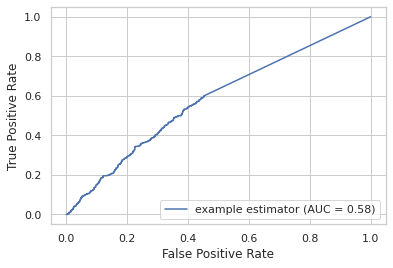

Dmel_OregonR_WT_6-8h_Neurons  using 1 dataset
Roc-auc score 0.5068602000759782


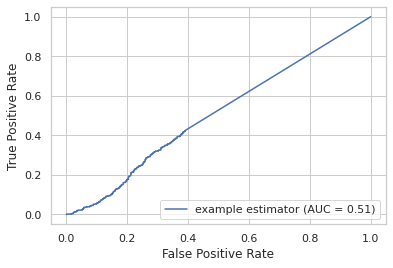

Dmel_OregonR_WT_6-8h_Glia  using 1 dataset
Roc-auc score 0.5797668426344897


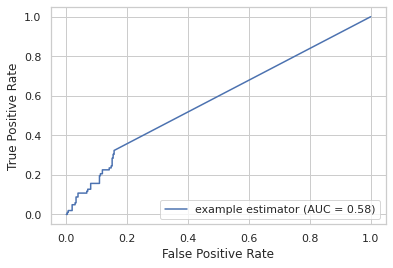

In [48]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

chromatin_loops_cols = ['Dmel_OregonR_WT_6-8h_Neuroblasts','Dmel_OregonR_WT_6-8h_Neurons','Dmel_OregonR_WT_6-8h_Glia']
statistics_wo_na = found_statistics_wider_types.fillna(0)
merged_data = statistics_wo_na.merge(ground_truth, how='left', on='loop_id')

for col_true in chromatin_loops_cols:
    print(col_true, ' using 1 dataset')
    cell_type = col_true.split('_')[-1]
    data = merged_data[~merged_data[col_true].isna()].copy()
    data = data[data['wider_type']==cell_type].copy()
    pred = data['fold_change']
    y = data[col_true]
    print('Roc-auc score',metrics.roc_auc_score(y, pred))

    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()


### Another comparison
If p-value <0.05 and fold_change >1, then fold_shange is our prediction. Otherwise, prediction is equal to 1.

In [49]:
statistics_wo_na[(statistics_wo_na['wider_type']=='Glia') & (statistics_wo_na['fold_change']>1)]

,loop_id,cicero_found,cell_type,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change,p-value,p-value-adjusted,wider_type
1707,L103,1,Glia,334.0,107008.0,7.0,1939.0,0.017806,1.152851,0.678053,0.931124,Glia
10032,L289,1,Glia,340.0,108684.0,1.0,263.0,0.002416,1.213987,0.562210,0.821403,Glia


Dmel_OregonR_WT_6-8h_Neuroblasts  using 1 dataset


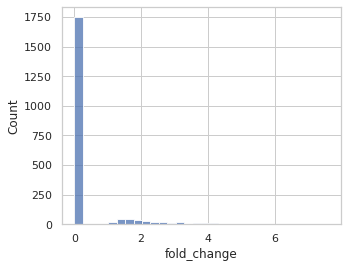

Roc-auc score 0.5505126124298371


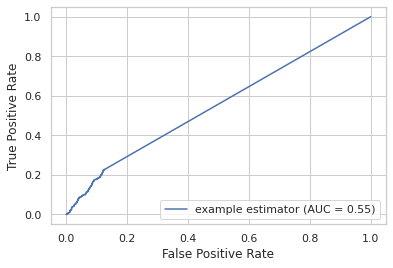

Dmel_OregonR_WT_6-8h_Neurons  using 1 dataset


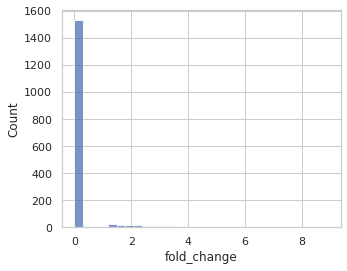

Roc-auc score 0.49739616309991136


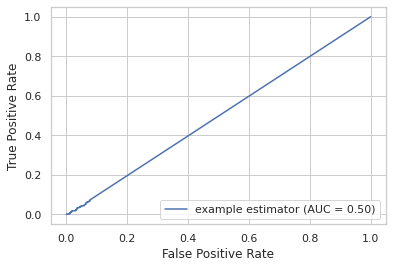

Dmel_OregonR_WT_6-8h_Glia  using 1 dataset


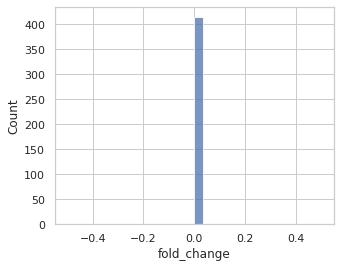

Roc-auc score 0.5


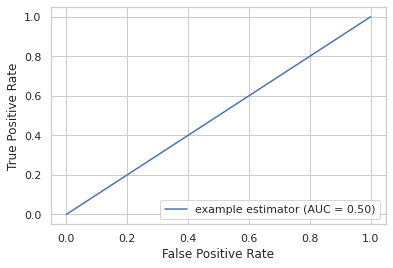

In [56]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

chromatin_loops_cols = ['Dmel_OregonR_WT_6-8h_Neuroblasts','Dmel_OregonR_WT_6-8h_Neurons','Dmel_OregonR_WT_6-8h_Glia']
statistics_wo_na = found_statistics_wider_types.fillna(0)
merged_data = statistics_wo_na.merge(ground_truth, how='left', on='loop_id')

for col_true in chromatin_loops_cols:
    print(col_true, ' using 1 dataset')
    cell_type = col_true.split('_')[-1]
    data = merged_data[~merged_data[col_true].isna()].copy()
    data = data[data['wider_type']==cell_type].copy()
    data.loc[(data['p-value']>=0.05) | (data['fold_change']<=1),'fold_change'] = 0

    sns.set_theme(style='whitegrid')
    plt.figure(figsize=(5, 4))
    sns.histplot(data['fold_change'], bins=30)
    plt.show()

    pred = data['fold_change']
    y = data[col_true]
    print('Roc-auc score',metrics.roc_auc_score(y, pred))

    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()


Histograms show that too many rows are not satisfying condition pval<0.05 and fold_change>1, so predictive power is not observe.

### Comparison part 3
Above I treated each (loop_id, cell_type) pair as single sample, but cell_type has more groups than our wider cell_type division.
Now we can aggregate statistics from all cell_types which correspond to one wider cell type. To do that, we will sum values from confusion matrix and calculate other statistics one more time.

In [51]:
found_statistics_grouped = found_statistics_wider_types.groupby(['loop_id','wider_type','cicero_found']).agg({'closed_this-type':'sum','closed_other-type':'sum','opened_this-type':'sum','opened_other-type':'sum'}).reset_index()
found_statistics_grouped

,loop_id,wider_type,cicero_found,closed_this-type,closed_other-type,opened_this-type,opened_other-type
0,L1,Glia,0,0.0,0.0,0.0,0.0
1,L1,Neuroblasts,0,0.0,0.0,0.0,0.0
2,L1,Neurons,0,0.0,0.0,0.0,0.0
3,L10,Glia,0,0.0,0.0,0.0,0.0
4,L10,Neuroblasts,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1246,L98,Neuroblasts,1,17764.0,510666.0,236.0,17774.0
1247,L98,Neurons,1,5248.0,417496.0,65.0,14343.0
1248,L99,Glia,1,338.0,105018.0,3.0,3929.0
1249,L99,Neuroblasts,1,17189.0,509591.0,811.0,18849.0


In [52]:
found_statistics_grouped = found_statistics_grouped.sort_values(by=['wider_type','loop_id'])
found_statistics_grouped['base_access'] = list(base_access) * len(set(found_statistics_grouped['wider_type']))
found_statistics_grouped['fold_change'] = found_statistics_grouped.apply(calculate_fold_change, axis=1)
found_statistics_grouped.head()

,loop_id,wider_type,cicero_found,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change
0,L1,Glia,0,0.0,0.0,0.0,0.0,NaN,NaN
3,L10,Glia,0,0.0,0.0,0.0,0.0,NaN,NaN
6,L100,Glia,1,341.0,108912.0,0.0,35.0,0.000320,0.0
9,L101,Glia,1,341.0,108934.0,0.0,13.0,0.000119,0.0
12,L102,Glia,0,0.0,0.0,0.0,0.0,NaN,NaN


In [53]:
found_statistics_grouped['p-value'] = found_statistics_grouped[found_statistics_grouped['cicero_found']==1].apply(lambda row: stats.fisher_exact([[row['opened_this-type'],row['closed_this-type']],[row['opened_other-type'],row['closed_other-type']]])[1], axis=1)

mask = found_statistics_grouped['p-value'].notna()
corrected_pvalues = multipletests(found_statistics_grouped.loc[mask, 'p-value'], method='fdr_bh')[1]
found_statistics_grouped.loc[mask, 'p-value-adjusted'] = corrected_pvalues

found_statistics_grouped.head()

,loop_id,wider_type,cicero_found,closed_this-type,closed_other-type,opened_this-type,opened_other-type,base_access,fold_change,p-value,p-value-adjusted
0,L1,Glia,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,L10,Glia,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,L100,Glia,1,341.0,108912.0,0.0,35.0,0.000320,0.0,1.0,1.0
9,L101,Glia,1,341.0,108934.0,0.0,13.0,0.000119,0.0,1.0,1.0
12,L102,Glia,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Firstly we use fold_change as predictor.

Dmel_OregonR_WT_6-8h_Neuroblasts  using 1 dataset
Roc-auc score 0.5729187800094677


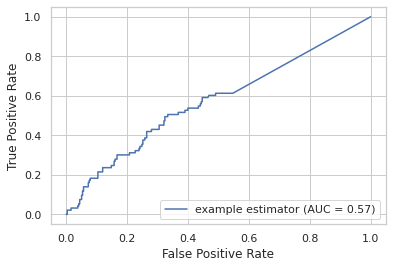

Dmel_OregonR_WT_6-8h_Neurons  using 1 dataset
Roc-auc score 0.48405723692541475


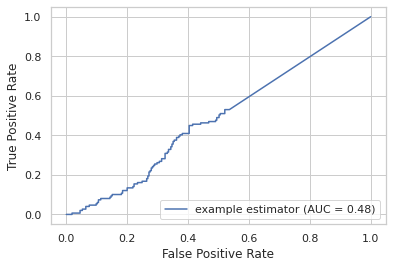

Dmel_OregonR_WT_6-8h_Glia  using 1 dataset
Roc-auc score 0.5797668426344897


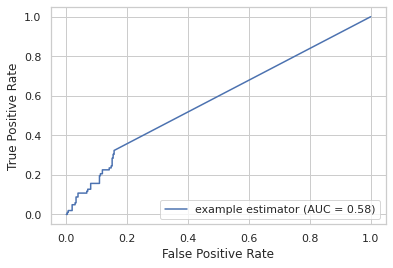

In [54]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

chromatin_loops_cols = ['Dmel_OregonR_WT_6-8h_Neuroblasts','Dmel_OregonR_WT_6-8h_Neurons','Dmel_OregonR_WT_6-8h_Glia']
statistics_wo_na = found_statistics_grouped.fillna(0)
merged_data = statistics_wo_na.merge(ground_truth, how='left', on='loop_id')

for col_true in chromatin_loops_cols:
    print(col_true, ' using 1 dataset')
    cell_type = col_true.split('_')[-1]
    data = merged_data[~merged_data[col_true].isna()].copy()
    data = data[data['wider_type']==cell_type].copy()
    pred = data['fold_change']
    y = data[col_true]
    print('Roc-auc score',metrics.roc_auc_score(y, pred))

    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()


Now we use fold_change as predictor only when p_value_adjusted<0.05 and fold_change>1.

Dmel_OregonR_WT_6-8h_Neuroblasts  using 1 dataset
Roc-auc score 0.5956921620342194


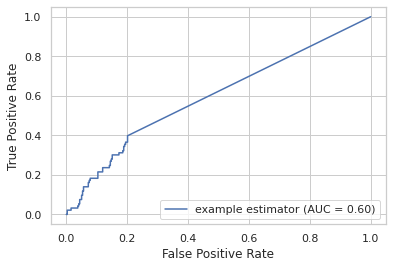

Dmel_OregonR_WT_6-8h_Neurons  using 1 dataset
Roc-auc score 0.48020767380017726


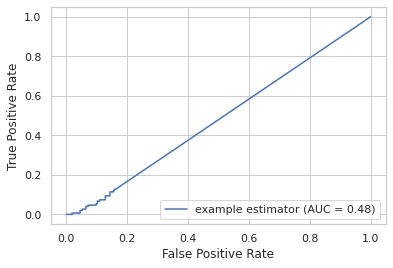

Dmel_OregonR_WT_6-8h_Glia  using 1 dataset
Roc-auc score 0.5


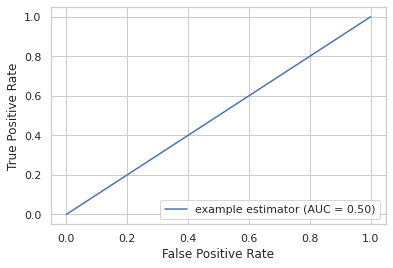

In [55]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

chromatin_loops_cols = ['Dmel_OregonR_WT_6-8h_Neuroblasts','Dmel_OregonR_WT_6-8h_Neurons','Dmel_OregonR_WT_6-8h_Glia']
statistics_wo_na = found_statistics_grouped.fillna(0)
merged_data = statistics_wo_na.merge(ground_truth, how='left', on='loop_id')

for col_true in chromatin_loops_cols:
    print(col_true, ' using 1 dataset')
    cell_type = col_true.split('_')[-1]
    data = merged_data[~merged_data[col_true].isna()].copy()
    data = data[data['wider_type']==cell_type].copy()
    data.loc[(data['p-value-adjusted']>=0.05) | (data['fold_change']<=1),'fold_change'] = -1
    pred = data['fold_change']
    y = data[col_true]
    print('Roc-auc score',metrics.roc_auc_score(y, pred))

    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()
